# Paris Housing

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('data/ParisHousingClass.csv')

In [63]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [64]:
df.shape

(10000, 18)

Data description

All attributes are numeric variables and they are listed bellow:

- squareMeters
- numberOfRooms
- hasYard
- hasPool
- floors - number of floors
- cityCode - zip code
- cityPartRange - the higher the range, the more exclusive the neighbourhood is
- numPrevOwners - number of prevoious owners
- made - year
- isNewBuilt
- hasStormProtector
- basement - basement square meters
- attic - attic square meters
- garage - garage size
- hasStorageRoom
- hasGuestRoom - number of guest rooms
- price - price of a house
- category - Luxury or Basic


## Data cleaning

In [65]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [66]:
df.duplicated().sum()

0

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [68]:
df.describe(include = 'all')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Basic
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8735
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06,NaN
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06,NaN
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04,NaN
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06,NaN
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06,NaN
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06,NaN


In [86]:
df["hasGuestRoom"].unique()

array([ 7,  2,  9,  3,  4,  1,  5, 10,  0,  8,  6], dtype=int64)

Some max values look excessive, in squareMeters or numberOfRooms for example.

The 'basic' value is overrepresented in the dataset, with 8735 samples against 1265 for the 'luxurious' value

## Feature Engineering

Let's create a new variable that will tell us if the house is fully equipped or not

In [116]:
df['hasFullPack'] = (
    (df['hasYard'] != 0) &
    (df['hasPool'] != 0) &
    (df['hasStormProtector'] != 0) &
    (df['hasStorageRoom'] != 0) &
    (df['hasGuestRoom'] != 0)
).astype(int)

In [118]:
df.loc[df["hasFullPack"]==1].shape

(589, 19)

Not very surprisingly, only a few housing (589) has all the characteristics.

## EDA

There isn't much to say except that the samples are evenly distributed in each and every explicatives variables throughout the dataset.

So the EDA will only serve the purpose of showcasing some data visualisation skills, with no interpretation behind it.

### Univariate Analysis

<Axes: xlabel='price', ylabel='Count'>

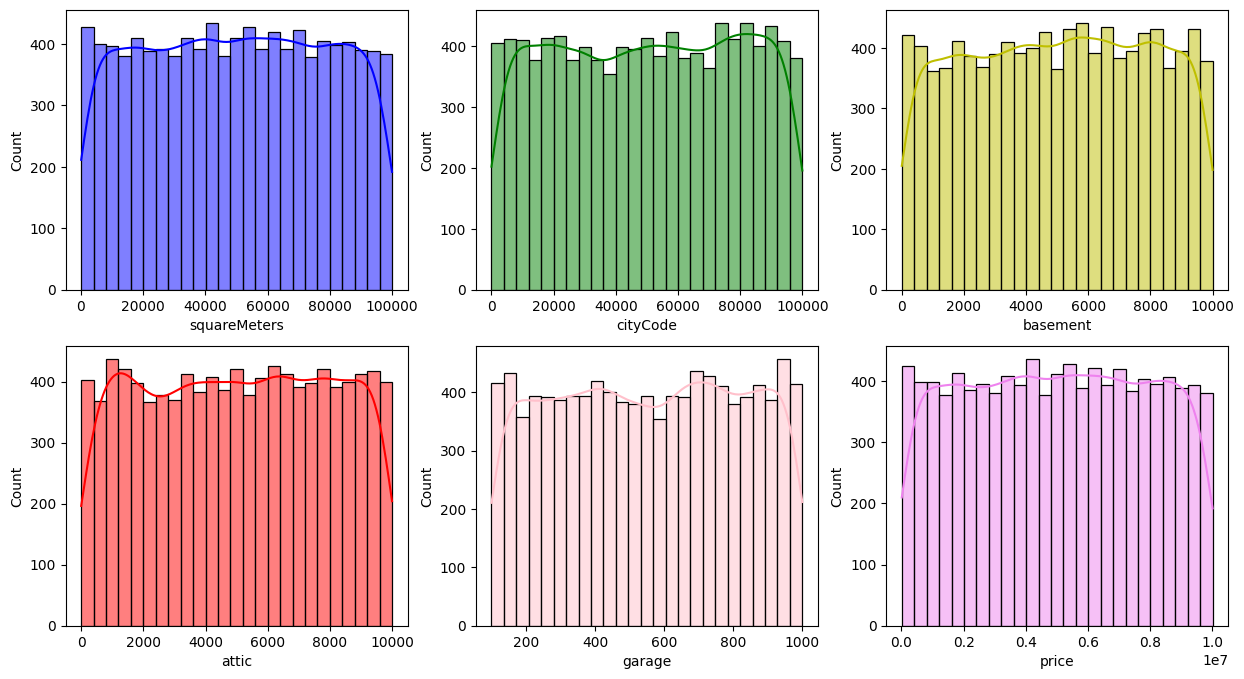

In [42]:
fig , axs = plt.subplots(2,3,figsize=(15,8))
plt.subplot(231)
sns.histplot(data=df,x="squareMeters",bins=25,kde=True, color='b')
plt.subplot(232)
sns.histplot(data=df,x="cityCode",bins=25,kde=True, color='g')
plt.subplot(233)
sns.histplot(data=df,x="basement",bins=25,kde=True, color='y')
plt.subplot(234)
sns.histplot(data=df,x="attic",bins=25,kde=True, color='r')
plt.subplot(235)
sns.histplot(data=df,x="garage",bins=25,kde=True, color='pink')
plt.subplot(236)
sns.histplot(data=df,x="price",bins=25,kde=True, color='violet')

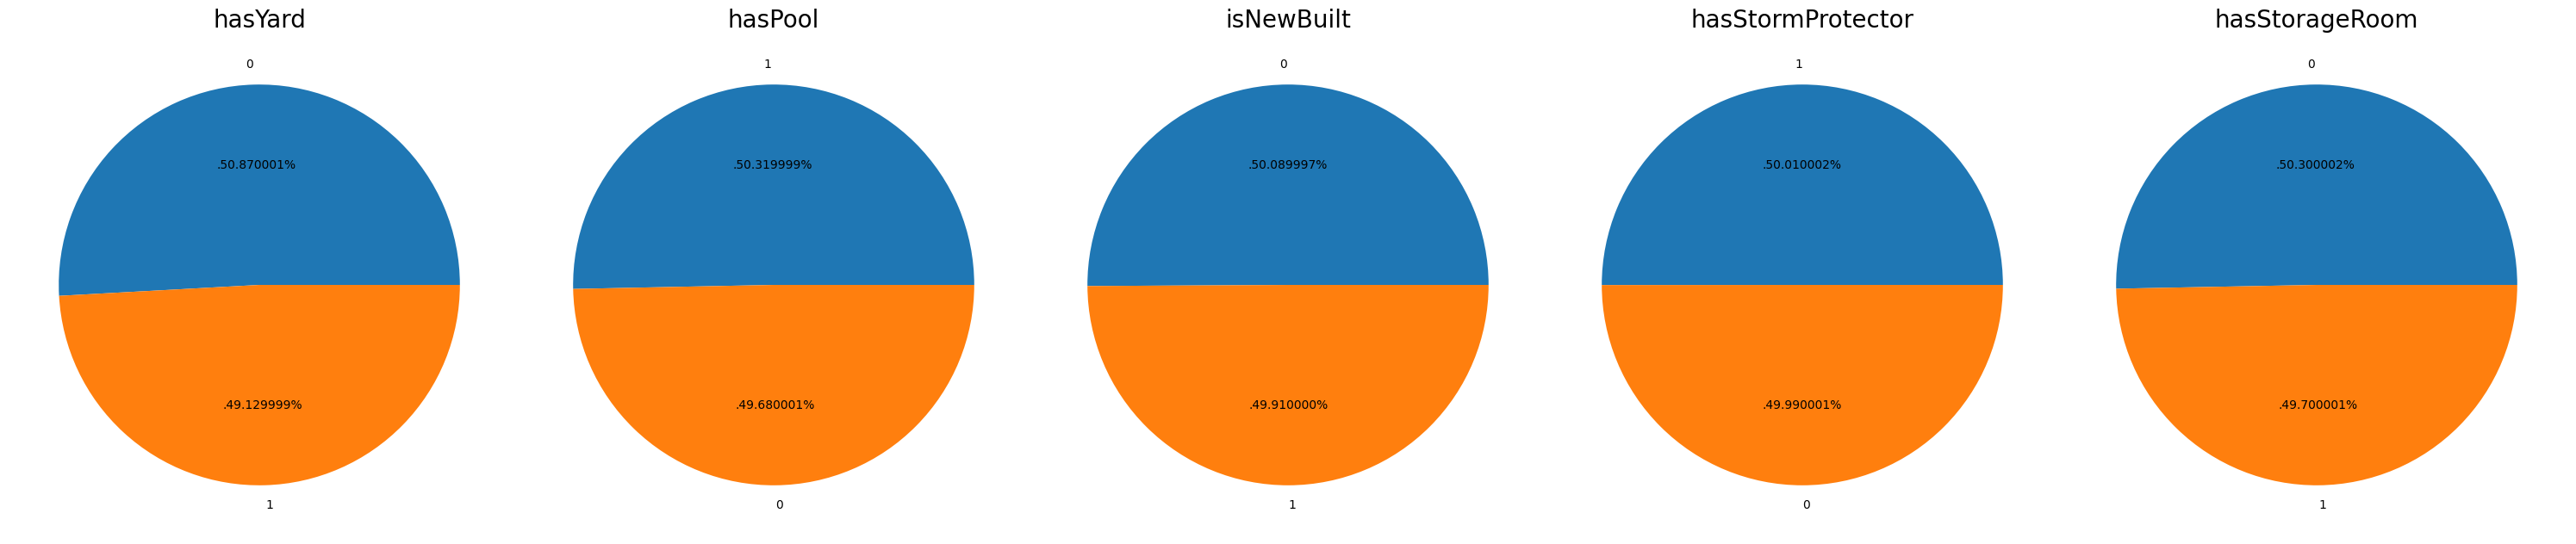

In [45]:
plt.rcParams['figure.figsize'] = (30, 30)
columns = ["hasYard","hasPool","isNewBuilt","hasStormProtector","hasStorageRoom"]
i=1
for col in columns:
    plt.subplot(1,5,i)
    size = df[col].value_counts()
    labels = df[col].unique()
    #color = ['red','green','blue','yellow','pink','orange', ]

    plt.pie(size,labels = labels,autopct = '.%2f%%')
    plt.title(col, fontsize = 20)
    plt.axis('off')
    i+=1
plt.tight_layout()
plt.grid()

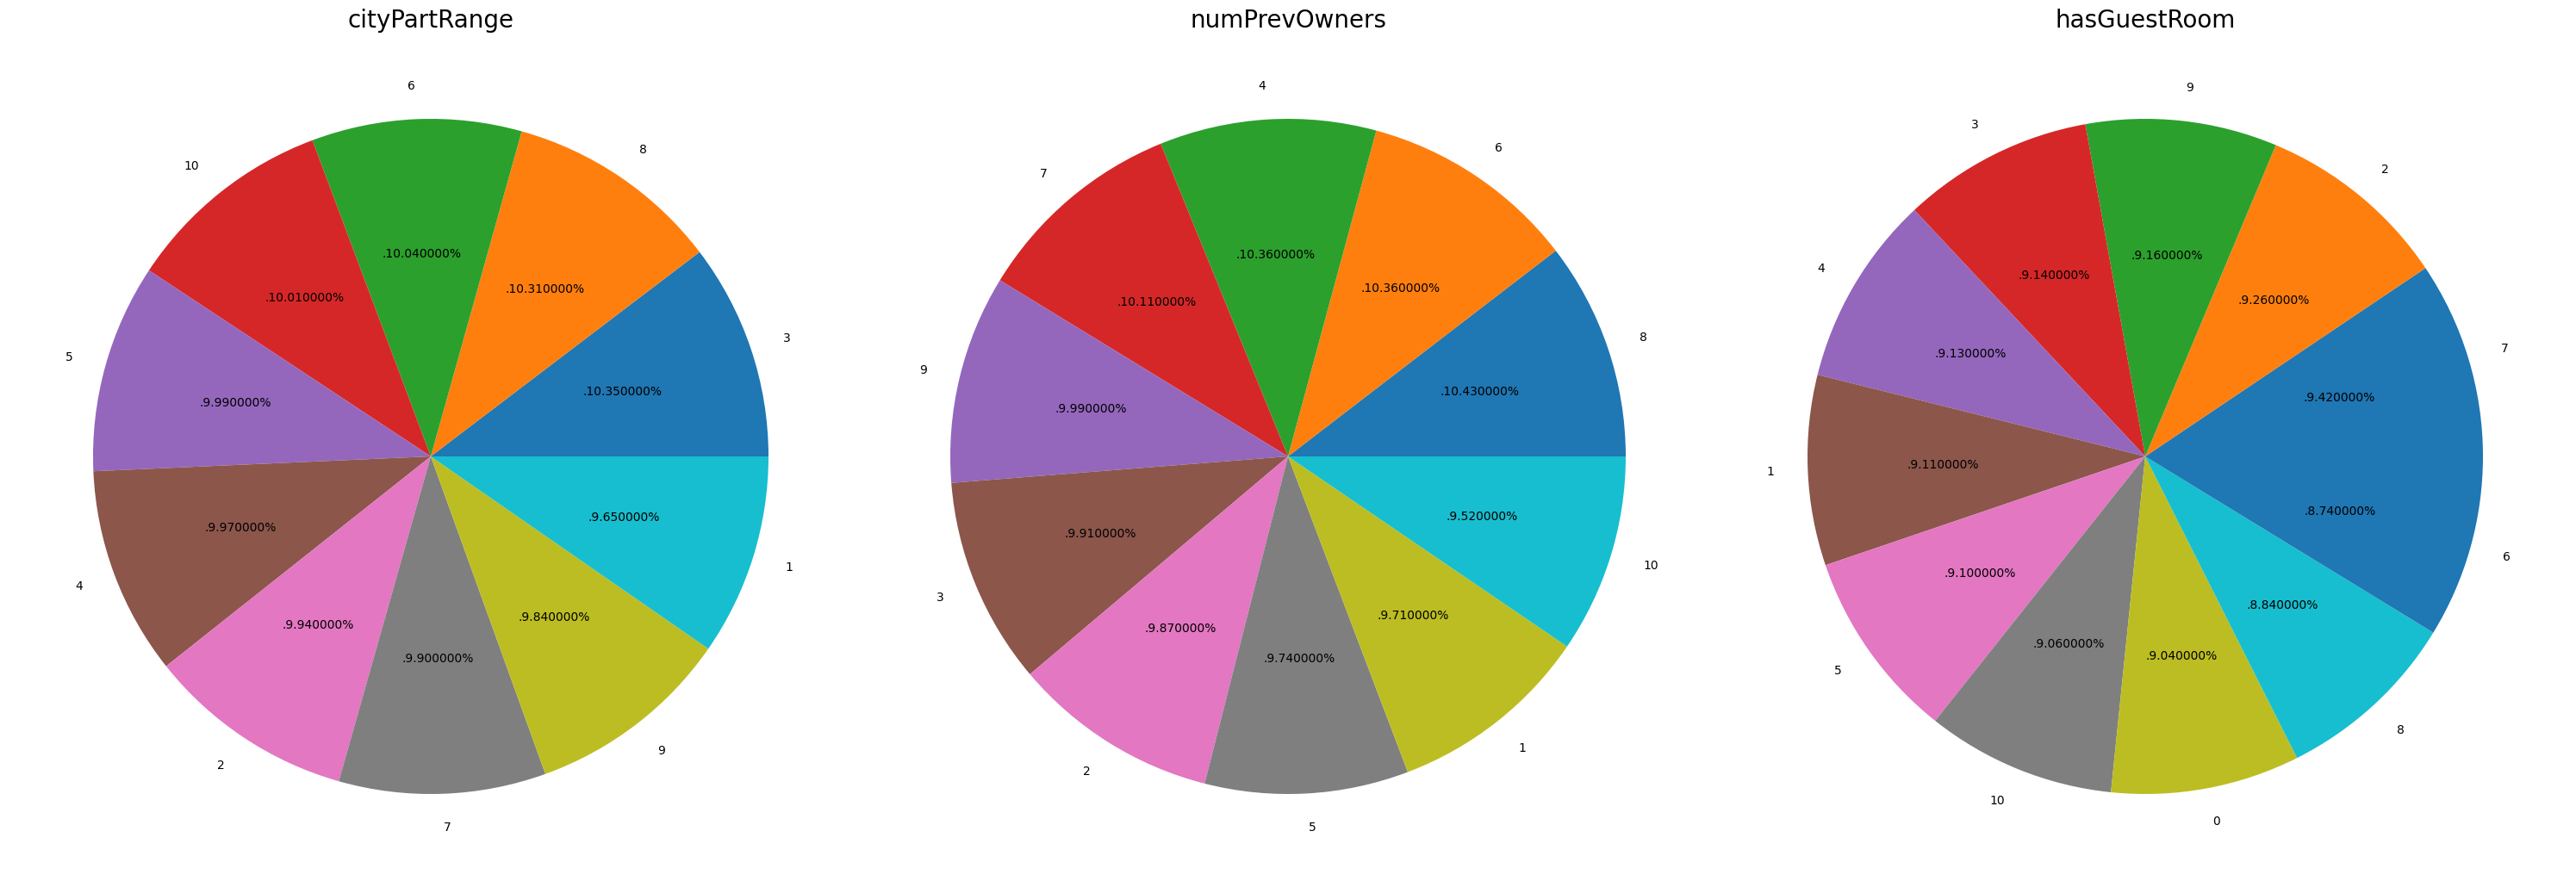

In [46]:
plt.rcParams['figure.figsize'] = (30, 30)
columns = ["cityPartRange","numPrevOwners","hasGuestRoom"]
i=1
for col in columns:
    plt.subplot(1,3,i)
    size = df[col].value_counts()
    labels = df[col].unique()

    plt.pie(size,labels = labels,autopct = '.%2f%%')
    plt.title(col, fontsize = 20)
    plt.axis('off')
    i+=1
plt.tight_layout()
plt.grid()


In [53]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')

<Axes: xlabel='numberOfRooms'>

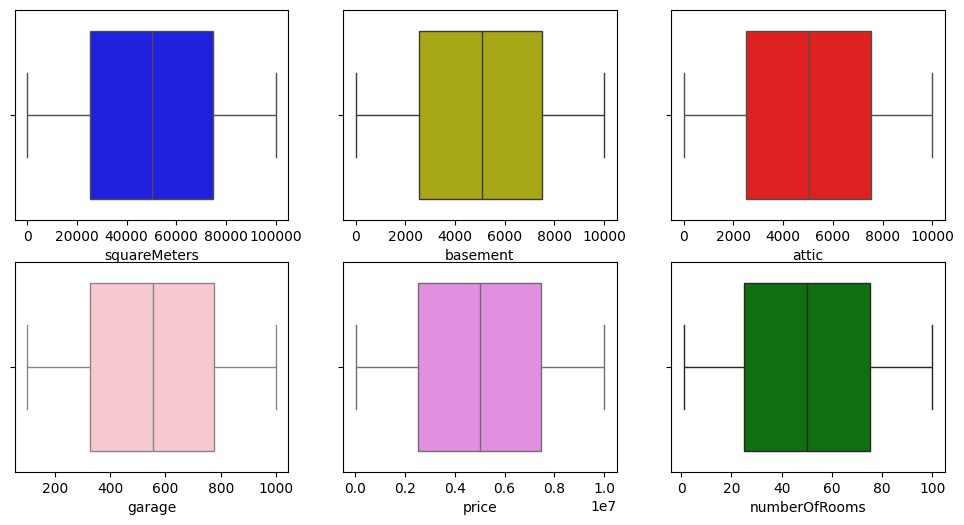

In [57]:
fig , axs = plt.subplots(2,3,figsize=(12,6))
plt.subplot(231)
sns.boxplot(data=df,x="squareMeters",color='b')
plt.subplot(232)
sns.boxplot(data=df,x="basement",color='y')
plt.subplot(233)
sns.boxplot(data=df,x="attic",color='r')
plt.subplot(234)
sns.boxplot(data=df,x="garage",color='pink')
plt.subplot(235)
sns.boxplot(data=df,x="price",color='violet')
plt.subplot(236)
sns.boxplot(data=df,x="numberOfRooms",color='g')

### Bivariate Analysis

## Export

Let's now export the file which will be used for the models

In [120]:
df.to_csv('data/ModifiedParisHousingClass.csv', index = False)